
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>
 
 
# Laboratorio: Análisis y Modelado de Series Temporales con SARIMAX

En este laboratorio, practicarás el análisis y modelado de series temporales utilizando el modelo SARIMAX. 
Objetivos del laboratorio

- Analizar series temporales:
	
    - Identificar tendencias, estacionalidad y posibles rupturas estructurales en los datos.
	
    - Verificar la estacionaridad de la serie mediante pruebas estadísticas y visuales.
	
    - Realizar análisis de autocorrelación (ACF) y autocorrelación parcial (PACF).

- Modelar la serie temporal:
	
    - Ajustar un modelo SARIMAX adecuado para los datos proporcionados.
	
    - Evaluar los resultados del modelo e interpretar los parámetros obtenidos.

- Interpretar gráficas y resultados:
	
    - Explicar de forma detallada el significado de las gráficas y resultados generados durante cada etapa del análisis.

# Instrucciones

- Parte 1: Carga y exploración inicial de los datos

    - Descarga el conjunto de datos proporcionado, que contiene una serie temporal de valores relacionados con ventas mensuales de una empresa ficticia durante los últimos 5 años.

    - Realiza una exploración inicial:

        - Gráfica la serie temporal completa para identificar posibles tendencias y estacionalidades.

        - Comenta tus observaciones iniciales sobre los patrones que encuentres.

- Parte 2: Estacionaridad


    - Evalúa si la serie es estacionaria:

    - Aplica el test de Dickey-Fuller aumentado (ADF).

    - Si es necesario, realiza transformaciones (diferenciación o logaritmos) para convertir la serie en estacionaria.

    - Genera una gráfica comparativa que muestre la serie original y la transformada, indicando las diferencias visuales.

    - Escribe una interpretación de los resultados del test ADF y de la gráfica.

- Parte 3: Análisis de autocorrelaciones


    - Genera los gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function).

    - Identifica:

        - El orden de diferenciación necesario (si aún no lo has hecho).

        - Los posibles valores para los parámetros p y q del modelo SARIMAX.

    - Explica qué indican las autocorrelaciones encontradas y cómo las utilizarás para definir los parámetros del modelo.

- Parte 4: Ajuste del modelo SARIMAX


    - Ajusta un modelo SARIMAX utilizando los parámetros identificados.

    - Evalúa el ajuste:

        - Observa los residuos del modelo.

        - Verifica si cumplen las condiciones de ruido blanco mediante análisis visual y pruebas estadísticas.

    - Ajusta el modelo si es necesario, iterando sobre los parámetros.

- Parte 5: Interpretación y predicción


    - Interpreta los coeficientes estimados del modelo (incluyendo estacionalidad y efectos externos si aplican).

    - Genera una predicción para los próximos 12 meses.

    - Gráfica las predicciones junto con la serie temporal original.

    - Comenta sobre:

        - La calidad de las predicciones.

        - La utilidad del modelo para la toma de decisiones.



In [1]:
%load_ext autoreload
%autoreload 2

from config import *

In [2]:
df = pd.read_csv('../datos/Truck_sales.csv').reset_index(drop=True)
df.sample(3)

,Month-Year,Number_Trucks_Sold
49,07-Feb,287
90,10-Jul,636
85,10-Feb,405


---
---
## Exploramos los datos y convertimos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['Year'] = df['Month-Year'].map(lambda x: '20' + x.split('-')[0])

df['Year'] = pd.to_datetime(df['Year']).dt.year

In [5]:
df['Full_Date'] = pd.to_datetime(df['Month-Year'], format='%y-%b', errors='coerce')

df['Month'] = df['Full_Date'].dt.strftime('%B')

df.drop(columns=['Month-Year'], inplace=True)

In [6]:
df.sample(3)

,Number_Trucks_Sold,Year,Full_Date,Month
72,336,2009,2009-01-01,January
17,230,2004,2004-06-01,June
114,756,2012,2012-07-01,July


In [7]:
df.isna().sum()

Number_Trucks_Sold    0
Year                  0
Full_Date             0
Month                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Number_Trucks_Sold  144 non-null    int64         
 1   Year                144 non-null    int32         
 2   Full_Date           144 non-null    datetime64[ns]
 3   Month               144 non-null    object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 4.1+ KB


---
---
## Ahora que tenemos las fechas, las pasamos al index y las ordenamos

In [9]:
df.index = df['Full_Date']
df.drop(columns=['Full_Date'], inplace=True)
df.sort_index(inplace=True)
df.head()

,Number_Trucks_Sold,Year,Month
Full_Date,,,
2003-01-01,155,2003,January
2003-02-01,173,2003,February
2003-03-01,204,2003,March
2003-04-01,219,2003,April
2003-05-01,223,2003,May


In [10]:
df['Year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014])

---
---
## Comenzamos la exploracion

In [11]:
df_copia = df.copy()

df_copia.reset_index(inplace=True)

df_copia.sample()

,Full_Date,Number_Trucks_Sold,Year,Month
50,2007-03-01,363,2007,March


In [12]:

analisis_st = sup_series.TimeSeriesAnalysis(df_copia, temporal_column='Full_Date', value_column='Number_Trucks_Sold')

analisis_st.exploracion_datos()

El número de filas es 144 y el número de columnas es 3

----------

No hay duplicados

----------

No hay valores nulos

----------

Estadísticas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Number_Trucks_Sold,144.00,428.73,188.63,152.00,273.50,406.00,560.25,958.00
Year,144.00,2008.50,3.46,2003.00,2005.75,2008.50,2011.25,2014.00


In [13]:
# comprobamos que sea una serie continua
analisis_st.comprobar_serie_continua()

La serie temporal es continua, no faltan meses.


---
---
## Vemos las tendencias y la esatacionalidad

In [14]:
# visualizamos a ver si tenemos tendencia en nuestros datos
analisis_st.graficar_serie()

In [15]:
# visualizamos la media movil
analisis_st.graficar_media_movil(window=12)

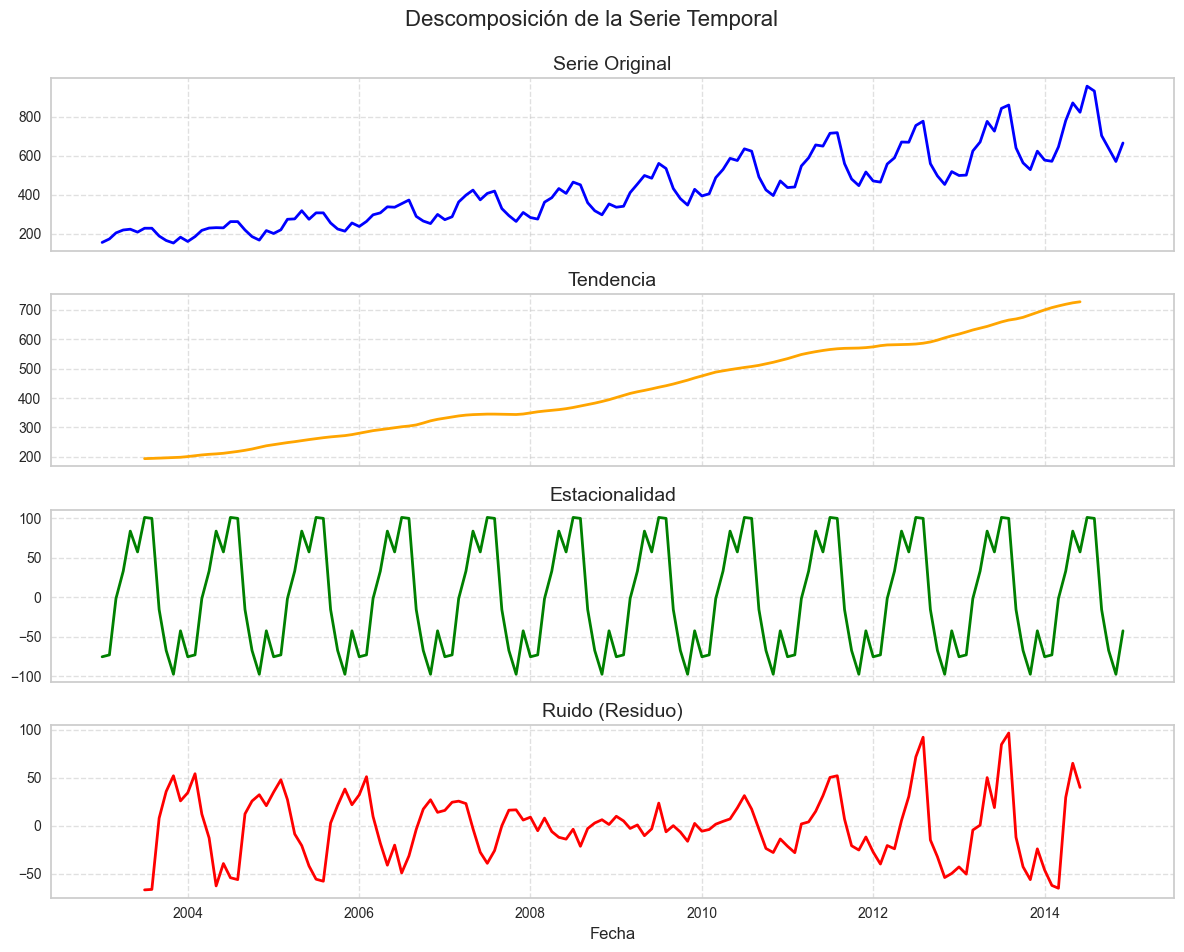

In [16]:
# vamos a ver si nuestros datos son estacionales
analisis_st.detectar_estacionalidad()

<Figure size 1200x1000 with 0 Axes>

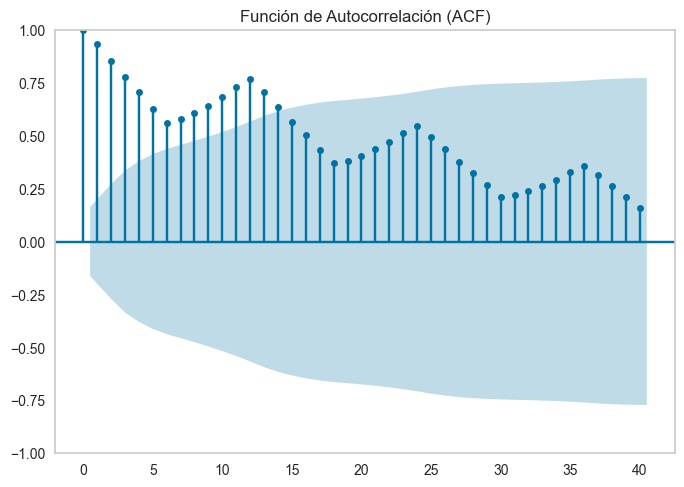

<Figure size 1200x1000 with 0 Axes>

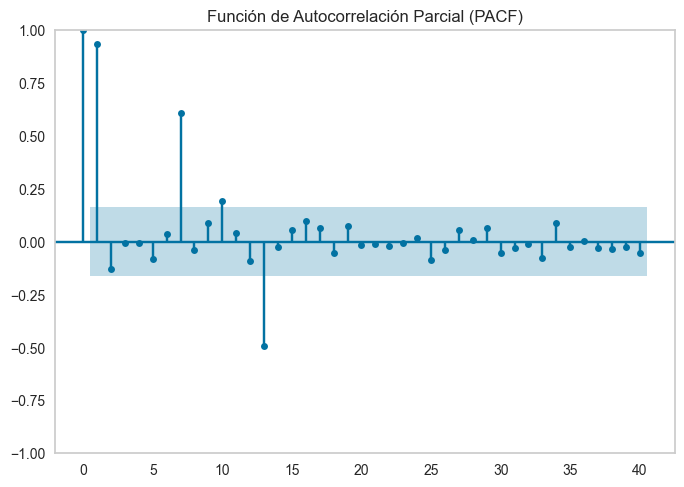

In [17]:
# Graficar ACF y PACF
analisis_st.graficar_acf_pacf(lags=40)

In [18]:
# Prueba de estacionariedad
analisis_st.prueba_estacionariedad()

ADF Statistic: 1.1158932574252651
p-value: 0.9953500083802601
Valores Críticos:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275
No podemos rechazar la hipótesis nula. La serie NO es estacionaria.


---
---
## Preparación Modelo Predictivo

In [19]:
train_size = int(0.7 * len(df_copia))
y_train, y_test = df_copia[:train_size], df_copia[train_size:]

In [20]:
sarima = sup_series.SARIMAModel()

# Definir los rangos para los parámetros
p_range = range(1, 5)
q_range = range(1, 5)
seasonal_order_ranges = (
    range(2),  # P
    range(2),  # D
    range(2),  # Q
    [12]       # S
)

# Generar parámetros
parametros = sarima.generar_parametros(p_range, q_range, seasonal_order_ranges)
parametros[:5] # Ver algunas combinaciones

[(1, 1, (0, 0, 0, 12)),
 (1, 1, (0, 0, 1, 12)),
 (1, 1, (0, 1, 0, 12)),
 (1, 1, (0, 1, 1, 12)),
 (1, 1, (1, 0, 0, 12))]

In [21]:
# Evaluar modelos
results_df = sarima.evaluar_modelos(y_train, y_test, parametros, diferenciacion=1, df_length=len(df_copia), variable="Number_Trucks_Sold")

# Ordenar resultados por RMSE
results_df = results_df.sort_values(by="RMSE", ascending=True)
results_df.head()

100%|██████████| 128/128 [00:00<00:00, 3471.43it/s]


ValueError: No se ha ajustado ningún modelo aún. Llama a 'evaluar_modelos' primero.